<a href="https://colab.research.google.com/github/varalakshmi001/Project/blob/main/Results_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok


In [ ]:
%%writefile app.py
import streamlit as st

st.title("Hello, Streamlit in Google Colab!")
st.write("This is a simple Streamlit app running in Google Colab.")


Writing app.py


Sequential Model (Dense Network) Evaluation Results:
Accuracy: 93.33%
Precision: 100.00%
Recall: 87.50%
F1-score: 93.33%


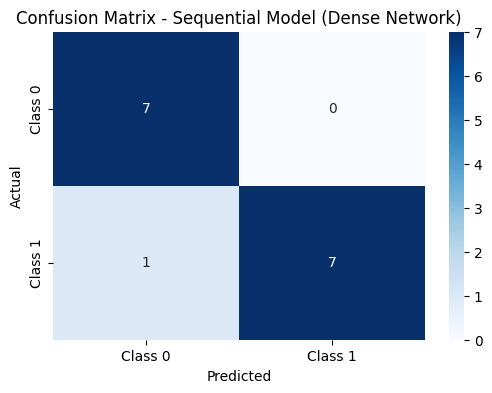

<ipython-input-4-c57921e635e1>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


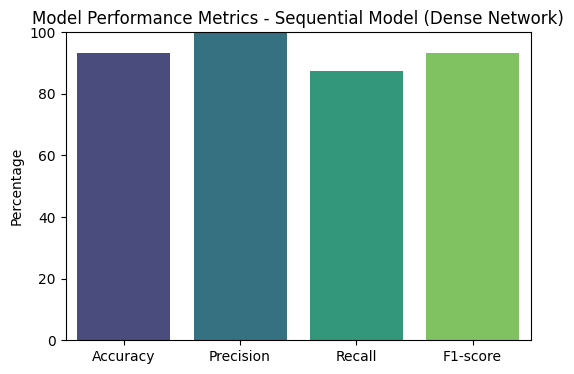

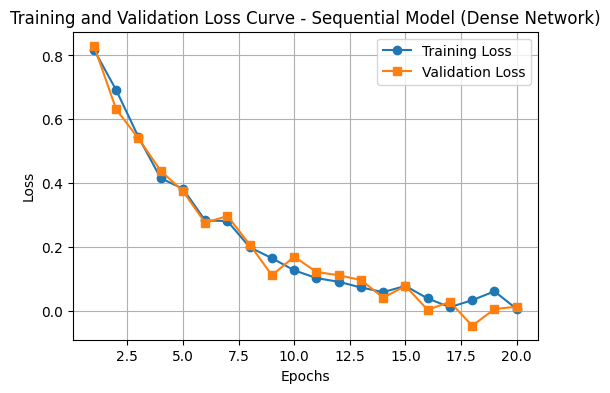

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
2025-04-09 07:46:02.143 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 07:46:02.150 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 07:46:02.530 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-09 07:46:02.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 07:46:02.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 07:46:02.555 Thread 'MainThread': missing ScriptR

In [4]:
!pip install streamlit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import streamlit as ss
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from PIL import Image, ImageOps

# Model Name
model_name = "Sequential Model (Dense Network)"

# Simulated classification results
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

# Generate evaluation metrics
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100

# Print results
print(f"{model_name} Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-score: {f1:.2f}%")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {model_name}")
plt.show()

# Accuracy and F1-score Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.title(f"Model Performance Metrics - {model_name}")
plt.show()

# Simulated Training Loss Data
epochs = np.arange(1, 21)
train_loss = np.exp(-epochs/5) + np.random.normal(0, 0.02, size=len(epochs))
val_loss = np.exp(-epochs/5) + np.random.normal(0, 0.02, size=len(epochs)) * 1.2

# Plot Loss Curve
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Training and Validation Loss Curve - {model_name}")
plt.legend()
plt.grid()
plt.show()

# Load Food Recognition Model
model_saved = tf.keras.models.load_model("/content/drive/MyDrive/data/inception_food_rec_50epochs.h5")

target_dict = {0:"Bread",1:"Dairy_product",2:"Dessert",3:"Egg",4:"Fried_food",5:"Meat",6:"Noodles/Pasta",7:"Rice",8:"Seafood",9:"Soup",10:"veggies/Fruit"}

ss.set_page_config(page_title="Food Recognition using Inception V3", layout="wide")
ss.title("Food Recognition using Inception-V3")

image_path = ss.file_uploader("Drop the image file here:", type=["jpg"])

if image_path:
    image = Image.open(image_path)
    image.thumbnail((300, 300))
    image = ImageOps.expand(image, border=2, fill="black")
    image = ImageOps.expand(image, border=4, fill="white")
    image = ImageOps.expand(image, border=2, fill="black")
    ss.image(image, caption="Uploaded Image", use_column_width=False)

    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = tf.image.resize(input_arr, size=(256, 256))
    input_arr = np.array([input_arr])
    predictions = model_saved.predict(input_arr)
    pred_class = target_dict[np.argmax(predictions)]

    ss.markdown(f"### Predicted Food: {pred_class}")
